# Introduction to Searching with APIs

Searching for scientific articles using an API (application programming interface) allows you to extract data from publisher platforms and databases. With an API, you can create programmatic searches of a citation database, extract statistical data, or query and manipulate your results within a Notebook.

In this module, we will learn to use the Crossref API to search for and analyze scientific articles.

## What is Crossref?

Crossref is a non-profit organization that helps to provides access to scientific literature. Crossref "makes research outputs easy to find, cite, link, and assess" (https://www.crossref.org/). 

Crossref data on scientific publications essentially consists of three elements:
<br>
    1) Metadata about a publication
    <br>
    2) A URL link to the article
    <br>
    3) A document identifier (doi)
    <br>
    
At present Crossref contains information on 80 million scientific publications including articles, books and book chapters.

## 0. Installing Packages <a id = '0'></a>

First we will install packages that will be useful to us as we explore the Crossref API. When importing a package into Jupyter Notebook, we use the command `pip install ...` to download a package into Jupyter Notebook. 

We then use the command `import (package name)` to use our new package in our code. 

In [123]:
# just run this cell

!pip install habanero
#To use Crossref API in Python, we need to import the habanero package
import habanero
from habanero import Crossref
from collections import Counter # for easy counting
import ast # for string to dictionary conversion
import pandas as pd # for data manipulation
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline 

## 1. Analysis using Crossref API <a id = '1'></a>
In the sections below, we will walk through the basics of Crossref.

Data can be accessed using the python packages `habanero`, `crossrefapi`, and `crossref-commons` installed above. In this 
, we'll be focusing on the functionality of the **habanero** package. 

## 1.1 Exploring a Crossref query <a id = '1.1'></a>
In the cells below, we walk through using Crossref and exploring the data it gives us. To create an object that takes on the Crossref identity, we assign it to the variable `cr`.

In [124]:
cr = Crossref() # create a crossref object

The main function we will use is called `cr.works()`. This function takes in a query name. As an example, we'll use the search term "permafrost".  

In order to save this output, we'll assign it to the variable name `permafrost`.

In [125]:
# query for the term "permafrost"
permafrost = cr.works(query = "permafrost")

If we inspect `permafrost`, we can see that it is a dictionary. A dictionary is a type of data structure that is indexed by keys.

In [126]:
type(permafrost)

dict

In the cell below, try creating your own query for a different search term. Make sure to save it to a variable! For now, limit your search term to a single word.

In [127]:
#Example: 
your_query_name = cr.works(query = "yourquery")


 ## 1.2 Keys, Indexes, Metadata <a id = '1.2'></a>
A dictionary contains key-value pairs, and we can access the values by calling on the keys. In our `permafrost` dictionary, we can inspect the keys and take a look at the values that it contains.

In [128]:
list(permafrost.keys())

['status', 'message-type', 'message-version', 'message']

Above, we can see that there are 4 different keys in our `permafrost` dictionary. We will focus on the values for the message key. In the cell below, we are accessing the values by *indexing* into the dictionary by the given keys.

In [129]:
permafrost['message']

{'facets': {},
 'total-results': 8205,
 'items': [{'indexed': {'date-parts': [[2020, 4, 15]],
    'date-time': '2020-04-15T02:44:23Z',
    'timestamp': 1586918663309},
   'reference-count': 18,
   'publisher': 'Wiley',
   'issue': '2',
   'license': [{'URL': 'http://doi.wiley.com/10.1002/tdm_license_1.1',
     'start': {'date-parts': [[2015, 9, 1]],
      'date-time': '2015-09-01T00:00:00Z',
      'timestamp': 1441065600000},
     'delay-in-days': 1911,
     'content-version': 'tdm'}],
   'content-domain': {'domain': [], 'crossmark-restriction': False},
   'short-container-title': ['Permafrost Periglac. Process.'],
   'DOI': '10.1002/ppp.695',
   'type': 'journal-article',
   'created': {'date-parts': [[2010, 6, 8]],
    'date-time': '2010-06-08T11:53:41Z',
    'timestamp': 1275998021000},
   'page': '215-218',
   'source': 'Crossref',
   'is-referenced-by-count': 5,
   'title': ['Report from the international permafrost association: the IPY permafrost legacy'],
   'prefix': '10.1002',

This dictionary is nested, meaning that we can have keys that lead to values which are more dictionaries. It seems like the `message` contains most of the information we're interested in. Below, take a look at the keys of the `message` component of the `permafrost` dictionary.

In [130]:
list(permafrost['message'].keys()) # keys of the permafrost message dictionary

['facets', 'total-results', 'items', 'items-per-page', 'query']

Just as we did before, we can inspect what information is contained for different keys of the dictionary. Let's focus on total results first.

In [131]:
# This tells us the total number of results from our query
permafrost['message']['total-results']

8205

In [132]:
permafrost['message']['items-per-page'] # tells us how many items per page 

20

In [133]:
permafrost['message']['query'] # details about our query

{'start-index': 0, 'search-terms': 'permafrost'}

In [134]:
permafrost['message']['items'] # the items of our query

[{'indexed': {'date-parts': [[2020, 4, 15]],
   'date-time': '2020-04-15T02:44:23Z',
   'timestamp': 1586918663309},
  'reference-count': 18,
  'publisher': 'Wiley',
  'issue': '2',
  'license': [{'URL': 'http://doi.wiley.com/10.1002/tdm_license_1.1',
    'start': {'date-parts': [[2015, 9, 1]],
     'date-time': '2015-09-01T00:00:00Z',
     'timestamp': 1441065600000},
    'delay-in-days': 1911,
    'content-version': 'tdm'}],
  'content-domain': {'domain': [], 'crossmark-restriction': False},
  'short-container-title': ['Permafrost Periglac. Process.'],
  'DOI': '10.1002/ppp.695',
  'type': 'journal-article',
  'created': {'date-parts': [[2010, 6, 8]],
   'date-time': '2010-06-08T11:53:41Z',
   'timestamp': 1275998021000},
  'page': '215-218',
  'source': 'Crossref',
  'is-referenced-by-count': 5,
  'title': ['Report from the international permafrost association: the IPY permafrost legacy'],
  'prefix': '10.1002',
  'volume': '21',
  'author': [{'given': 'Jerry',
    'family': 'Brown'

Above, we can see that the `items` contains the majority of information about our query on permafrost. It contains a list of all of the results - we can check this with the `type` command we used earlier. Since we only are looking at the first page, our items list has only 20 items in it.

In [135]:
type(permafrost['message']['items'])

list

In [136]:
len(permafrost['message']['items'])

20

## 1.3 Creating Tables <a id = '1.3'></a>
When our data exists in dictionaries, it's a little hard to explore and manipulate. In order to tackle this, we'll create a dataframe of the information so that we can access it more easily.

In [137]:
df_permafrost = pd.DataFrame(permafrost['message']['items'])
df_permafrost.head() # show the first 5 rows

,indexed,reference-count,publisher,issue,license,content-domain,short-container-title,DOI,type,created,...,subject,publisher-location,isbn-type,published-print,update-policy,ISBN,assertion,short-title,subtitle,archive
0,"{'date-parts': [[2020, 4, 15]], 'date-time': '...",18,Wiley,2,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[Permafrost Periglac. Process.],10.1002/ppp.695,journal-article,"{'date-parts': [[2010, 6, 8]], 'date-time': '2...",...,[Earth-Surface Processes],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2020, 6, 9]], 'date-time': '2...",308,Springer International Publishing,NaN,"[{'URL': 'http://www.springer.com/tdm', 'start...","{'domain': ['link.springer.com'], 'crossmark-r...",NaN,10.1007/978-3-030-31379-1_5,book-chapter,"{'date-parts': [[2020, 1, 1]], 'date-time': '2...",...,NaN,Cham,"[{'value': '9783030313784', 'type': 'print'}, ...",{'date-parts': [[2020]]},http://dx.doi.org/10.1007/springer_crossmark_p...,"[9783030313784, 9783030313791]","[{'value': '2 January 2020', 'order': 1, 'name...",NaN,NaN,NaN
2,"{'date-parts': [[2020, 4, 10]], 'date-time': '...",0,Wiley,NaN,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,10.1002/(issn)1099-1530,journal,"{'date-parts': [[2006, 3, 21]], 'date-time': '...",...,[Earth-Surface Processes],NaN,NaN,NaN,NaN,NaN,NaN,[Permafrost Periglac. Process.],NaN,NaN
3,"{'date-parts': [[2020, 4, 8]], 'date-time': '2...",47,Wiley,4,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[Permafrost Periglac. Process.],10.1002/ppp.464,journal-article,"{'date-parts': [[2003, 12, 19]], 'date-time': ...",...,[Earth-Surface Processes],NaN,NaN,"{'date-parts': [[2003, 10]]}",NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2020, 4, 15]], 'date-time': '...",2,Wiley,4,[{'URL': 'http://doi.wiley.com/10.1002/tdm_lic...,"{'domain': [], 'crossmark-restriction': False}",[Permafrost Periglac. Process.],10.1002/ppp.711,journal-article,"{'date-parts': [[2010, 12, 30]], 'date-time': ...",...,[Earth-Surface Processes],NaN,NaN,"{'date-parts': [[2010, 10]]}",NaN,NaN,NaN,NaN,NaN,NaN


There are a bunch of columns in our table, and we can't see all of them by scrolling. Below, we can look at a list of the columns instead.

In [138]:
df_permafrost.columns

Index(['indexed', 'reference-count', 'publisher', 'issue', 'license',
       'content-domain', 'short-container-title', 'DOI', 'type', 'created',
       'page', 'source', 'is-referenced-by-count', 'title', 'prefix', 'volume',
       'author', 'member', 'published-online', 'reference', 'container-title',
       'language', 'link', 'deposited', 'score', 'issued', 'references-count',
       'journal-issue', 'URL', 'relation', 'ISSN', 'issn-type', 'subject',
       'publisher-location', 'isbn-type', 'published-print', 'update-policy',
       'ISBN', 'assertion', 'short-title', 'subtitle', 'archive'],
      dtype='object')

Container-title seems to stand in for Journal Title. Let's look at what's in the container title column:

In [139]:
journal_titles = df_permafrost['container-title']
journal_titles

0     [Permafrost and Periglacial Processes]
1                       [Thawing Permafrost]
2                                        NaN
3     [Permafrost and Periglacial Processes]
4     [Permafrost and Periglacial Processes]
5     [Permafrost and Periglacial Processes]
6     [Permafrost and Periglacial Processes]
7     [Permafrost and Periglacial Processes]
8     [Permafrost and Periglacial Processes]
9     [Permafrost and Periglacial Processes]
10    [Permafrost and Periglacial Processes]
11    [Permafrost and Periglacial Processes]
12    [Permafrost and Periglacial Processes]
13    [Permafrost and Periglacial Processes]
14    [Permafrost and Periglacial Processes]
15    [Permafrost and Periglacial Processes]
16    [Permafrost and Periglacial Processes]
17    [Permafrost and Periglacial Processes]
18    [Permafrost and Periglacial Processes]
19    [Permafrost and Periglacial Processes]
Name: container-title, dtype: object

We can do the same for the publisher column.

In [140]:
df_permafrost['publisher']

0                                 Wiley
1     Springer International Publishing
2                                 Wiley
3                                 Wiley
4                                 Wiley
5                                 Wiley
6                                 Wiley
7                                 Wiley
8                                 Wiley
9                                 Wiley
10                                Wiley
11                                Wiley
12                                Wiley
13                                Wiley
14                                Wiley
15                                Wiley
16                                Wiley
17                                Wiley
18                                Wiley
19                                Wiley
Name: publisher, dtype: object

## 1.4 Data Retrieval <a id = '1.4'></a>

We want to be able to retrieve more data from CrossRef. A single CrossRef query can return up to 1,000 results, and since our query has over 42,000 total results, we would need to make 43 queries. Remember at the beginning, we only had 20 results since we only grabbed the first page. The CrossRef API permits fetching results from multiple pages, so by setting `cursor` to `*` and `cursor_max` to 1000 we can grab 1000 queries at once. Querying all 42,000 results would take a long time, so for the purposes of this demonstration we are only using 1000. If you have more time, you could query more results, but be aware that it will take a long time.

In [141]:
# this cell will take a while to run
cr_permafrost = cr.works(query="permafrost", cursor = "*", cursor_max = 1000, progress_bar = True)


100%|██████████| 49/49 [00:49<00:00,  1.00s/it]


We can check that we have the 1,000 messages, and indeed we do.

In [142]:
sum([len(k['message']['items']) for k in cr_permafrost])

1000

Remember before, when you created your own search query? Here, we'll go through a few steps to get more results for your query. First, we'll check how many total results your query has. Run the cell below to find out.

In [143]:
query['message']['total-results']

NameError: name 'query' is not defined

If there are fewer than 1000 results, then set `cursor_max` to the number of results. If there are more than 1000 results, set `cursor_max` to 1000 so that the code won't take too long to run. Be sure to fill in `query` with the same search term you used earlier.

In [ ]:
#Your example
cr_query = cr.works(query="queryname", cursor = "*", cursor_max = 1000, progress_bar = True)

In order to get all of the different results from our permafrost query, we need to extract them from `cr_permafrost`. Below, we create a list where each element is one result. `cr_permafrost` is a list consisting of pages, where we have 20 results per page. So `cr_permafrost` has 50 pages of 20 results each, giving us our 1000 results. In order to extract the info and have a list with each element be one results, we need to do some data manipulation.

In [144]:
#Confirm the number of pages
len(cr_permafrost)

50

In the cell below, we have 2 list comprehensions to get the results from our query. The first one creates a length 50 list that contains only the items instead of the entire dictionary, for each of the 50 pages. The second list comprehension extracts all of the items from the nested lists so that we have a single 1000 item list where each element is one result.

In [145]:
permafrost_items = [k['message']['items'] for k in cr_permafrost] # get items for all pages
permafrost_items = [item for sublist in permafrost_items for item in sublist] # restructure list

We'll do the same for your query results so that you can have some fun plotting later in the notebook. Just run the cell below.

In [ ]:
query_items = [k['message']['items'] for k in cr_query] # get items for all pages
query_items = [item for sublist in query_items for item in sublist] # restructure list

## 1.5 More on Searches <a id = '1.5'></a>
You may be curious about the `cr.works` function that we've been using to get our data. This is the function that processes your topical "search". There are different arguments, and we've seen how changing these arguments can help us get more search results than just the first 20. 

Also, before we asked you to limit your search term to a single word. This is not a hard restriction - we simply did this for simplicity. You can query terms that are more specific and include more words - try it out below! Keep in mind that the more specific your search query, the fewer results you may see. Feel free to play around with it.

In [ ]:
query2 = cr.works(query = 'labrador retriever')
query2['message']['total-results']

# 2. Visualization <a id = '2'></a>
Visualization is an important part of data analysis. Rather than looking at dictionaries and dataframes, we can see a visual summary of our data. In this section, we'll go over different types of visualizations we can make based off of the different data we have. We'll start by looking at the publishers. But first, we need to do some wrangling to get the data in a form that's useful for us.

# 2.1 Grouping and Sorting by Journal <a id = '2.1'></a>
In section 1.3, we took our query results and converted them from a dictionary to a dataframe. Below, we will do this for our list of 1000 `permafrost_items`, and then we can use the dataframe methods of grouping and sorting to get the counts of articles published by each publisher. We can also group by other columns, such as `type` or `language`.

In the cell below, we create a dataframe containing all 1000 of our permafrost query results.

In [146]:
permafrost_df = pd.DataFrame(permafrost_items)
permafrost_df.head(10)

,indexed,reference-count,publisher,issue,content-domain,short-container-title,published-print,DOI,type,created,...,event,institution,accepted,update-to,review,edition-number,original-title,chair,approved,degree
0,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",0,Informa UK Limited,3,"{'domain': [], 'crossmark-restriction': False}","[Geografiska Annaler. Series A, Physical Geogr...",{'date-parts': [[1986]]},10.2307/521451,journal-article,"{'date-parts': [[2006, 7, 5]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'date-parts': [[2019, 11, 20]], 'date-time': ...",0,Informa UK Limited,3,"{'domain': [], 'crossmark-restriction': False}","[Geografiska Annaler. Series A, Physical Geogr...",{'date-parts': [[1986]]},10.2307/521452,journal-article,"{'date-parts': [[2006, 7, 5]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'date-parts': [[2019, 12, 1]], 'date-time': '...",0,Informa UK Limited,2,"{'domain': [], 'crossmark-restriction': False}",[Norsk Geografisk Tidsskrift - Norwegian Journ...,"{'date-parts': [[2005, 6]]}",10.1080/00291950510038403,journal-article,"{'date-parts': [[2005, 9, 6]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'date-parts': [[2019, 12, 1]], 'date-time': '...",34,Informa UK Limited,2,"{'domain': [], 'crossmark-restriction': False}",[Norsk Geografisk Tidsskrift - Norwegian Journ...,"{'date-parts': [[2005, 6]]}",10.1080/00291950510020664,journal-article,"{'date-parts': [[2005, 9, 6]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'date-parts': [[2019, 12, 1]], 'date-time': '...",53,Informa UK Limited,2,"{'domain': [], 'crossmark-restriction': False}",[Norsk Geografisk Tidsskrift - Norwegian Journ...,"{'date-parts': [[2005, 6]]}",10.1080/00291950510038377,journal-article,"{'date-parts': [[2005, 9, 6]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'date-parts': [[2019, 12, 1]], 'date-time': '...",22,Informa UK Limited,2,"{'domain': [], 'crossmark-restriction': False}",[Norsk Geografisk Tidsskrift - Norwegian Journ...,"{'date-parts': [[2005, 6]]}",10.1080/00291950510020592,journal-article,"{'date-parts': [[2005, 9, 6]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'date-parts': [[2019, 12, 1]], 'date-time': '...",39,Informa UK Limited,2,"{'domain': [], 'crossmark-restriction': False}",[Norsk Geografisk Tidsskrift - Norwegian Journ...,"{'date-parts': [[2005, 6]]}",10.1080/00291950510038395,journal-article,"{'date-parts': [[2005, 9, 6]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"{'date-parts': [[2019, 12, 19]], 'date-time': ...",0,Kluwer Academic Publishers,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,NaN,10.1007/1-4020-4513-1_170,book-chapter,"{'date-parts': [[2006, 2, 13]], 'date-time': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"{'date-parts': [[2019, 12, 24]], 'date-time': ...",0,PeerJ,NaN,"{'domain': [], 'crossmark-restriction': False}",NaN,NaN,10.7287/peerj.preprints.27119,posted-content,"{'date-parts': [[2018, 8, 15]], 'date-time': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"{'date-parts': [[2020, 1, 1]], 'date-time': '2...",88,Wiley,2,"{'domain': [], 'crossmark-restriction': False}",[Permafrost Periglac. Process.],"{'date-parts': [[1993, 4]]}",10.1002/ppp.3430040205,journal-article,"{'date-parts': [[2007, 2, 5]], 'date-time': '2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


While we are at it, we'll convert your search query items into a data frame as well. Adapt the code in the cell to create a dataframe out of your `query_items` list.

In [ ]:
# example
query_df = pd.DataFrame(query_items)
query_df.head()

## Counts
We can take the value_count to determine the number of times a given journal or work appears in our results. This will help us determine where research on our topic is commonly published. 

In [147]:
journal = permafrost_df['container-title'].str[0].value_counts().rename_axis('titles').reset_index(name='counts')
journal

,titles,counts
0,Permafrost and Periglacial Processes,135
1,Canadian Journal of Earth Sciences,61
2,Canadian Geotechnical Journal,57
3,Cold Regions Science and Technology,27
4,Cold Regions Engineering 2019,24
...,...,...
295,Journal of Forensic Sciences,1
296,Recarbonization of the Biosphere,1
297,GIScience & Remote Sensing,1
298,Russian journal of transport engineering,1


In [ ]:
#Try repeating this for your query to see the top 20 titles.
query_journals = query_df['container-title'].str[0].value_counts().rename_axis('titles').reset_index(name='counts')
query_journals.head(20)

The `journal` dataframe above shows us that we have about 300 different titles, and a lot of them published only a few articles. The journal that appears most often published 135 articles on our topic.

# 2.2 Bar Charts <a id = '2.2'></a>
Now that we have a sorted dataframe with journal titles and the number of articles they each published on permafrost, we can use this dataframe to plot the journals with the 10 highest counts.

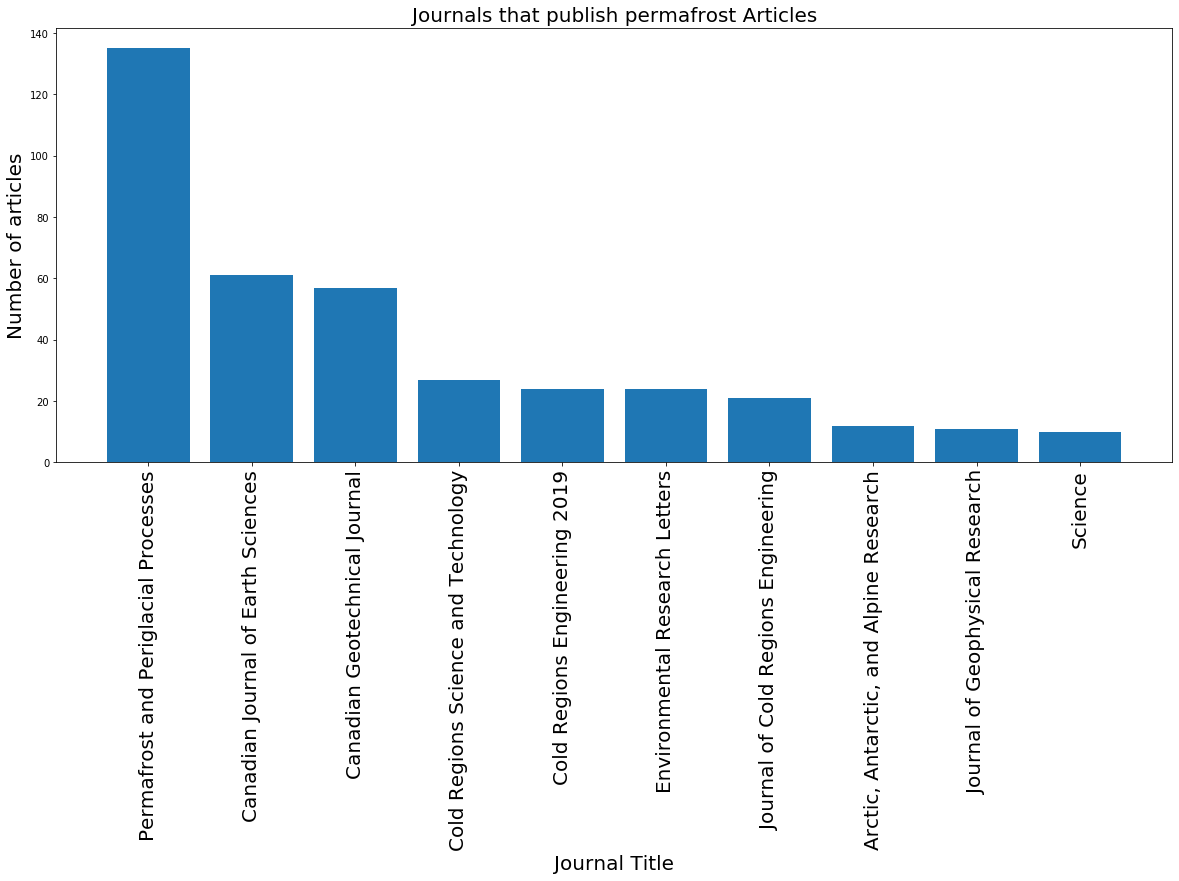

In [148]:
permafrost_journals_top10 = journal.head(10) # get first 10 publishers 

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(permafrost_journals_top10['titles'], permafrost_journals_top10['counts']) 

# rotate publisher names for readability
plt.xticks(permafrost_journals_top10['titles'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Journals that publish permafrost Articles', fontsize = 20) # set title
plt.xlabel('Journal Title', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

Before, we grouped by journal title. Keep in mind that we can group by other tags as well, such as type of article (`type`) or the language the article was published in (`language`). In the cell below, we use another method to group by either `type` or `language` and plot the resulting bar chart. Remember to sort your dataframe as well.

In [ ]:
# fill in the ...

counts = permafrost_df.groupby('...').count()['indexed'].reset_index()
counts = counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_counts = counts.sort_values(by='count', ascending = False)
sorted_counts

In [ ]:
# fill in the ...

plt.figure(figsize=(20,8)) # set figure size

# create bar plot 
plt.bar(sorted_counts['...'], sorted_counts['count']) 

# rotate labels for readability
plt.xticks(sorted_counts['...'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('...', fontsize = 20) # set title
plt.xlabel('...', fontsize = 20) # set x label
plt.ylabel('...', fontsize = 20); # set y label

In [149]:
# types

permafrost_type_counts = permafrost_df.groupby('type').count()['indexed'].reset_index()
permafrost_type_counts = permafrost_type_counts.rename({'indexed':'count'}, axis = 1) # rename counts column

sorted_permafrost_type_counts = permafrost_type_counts.sort_values(by='count', ascending = False)
sorted_permafrost_type_counts

,type,count
5,journal-article,787
9,posted-content,68
10,proceedings-article,57
0,book-chapter,35
4,dissertation,18
11,report,16
6,journal-issue,9
1,book-part,3
8,peer-review,3
7,other,2


In [ ]:
# types

plt.figure(figsize=(20,8)) # set figure size

# create bar plot with publishers and counts
plt.bar(sorted_permafrost_type_counts['type'], sorted_permafrost_type_counts['count']) 

# rotate publisher names for readability
plt.xticks(sorted_permafrost_type_counts['type'], rotation='vertical', fontsize = 20) 

# labeling
plt.title('Types of permafrost Published Works', fontsize = 20) # set title
plt.xlabel('Type', fontsize = 20) # set x label
plt.ylabel('Number of articles', fontsize = 20); # set y label

If you'd like, you can use the cell below to create bar charts of `publisher`, `language`, or `type` for your own query by grouping and sorting your `query_df` dataframe! Feel free to reference the cells above for an example with `permafrost_df`.

In [ ]:
# your code here

# 3. Citations <a id = '3'></a>
In scientific literature, we are often also interested in the number of references a journal article has, or the number of times the article was cited. Let's see which articles have been cited the most - we can do this by sorting our dataframe by the `is-referenced-by-count` column. Our dataframe has 45 columns, but we'll just focus on a few. We'll look at the `title`, `is-referenced-by-count`, `publisher`, and `published-print` (the date it was published in print).

In [150]:
most_cited = permafrost_df.sort_values('is-referenced-by-count', ascending=False)
most_cited = most_cited[['title', 'is-referenced-by-count', 'container-title', 'published-print', 'DOI']]
most_cited

,title,is-referenced-by-count,container-title,published-print,DOI
761,[Ecological controls on methane emissions from...,181,[Global Biogeochemical Cycles],"{'date-parts': [[1995, 12]]}",10.1029/95gb02379
655,[Thermal response of the active layer to clima...,141,[Cold Regions Science and Technology],"{'date-parts': [[1991, 5]]}",10.1016/0165-232x(91)90002-x
620,[Microclimatic Influences on Ground Temperatur...,137,[Canadian Journal of Earth Sciences],"{'date-parts': [[1975, 8, 1]]}",10.1139/e75-129
645,[Importance of permafrost as a source of water...,131,[Ecological Research],"{'date-parts': [[2002, 7]]}",10.1046/j.1440-1703.2002.00506.x
779,[Small-scale polygonal features on Mars: Seaso...,126,[Journal of Geophysical Research: Planets],"{'date-parts': [[1997, 11, 25]]}",10.1029/97je02582
...,...,...,...,...,...
813,[The role of photodegradation on the mineraliz...,0,NaN,NaN,10.5194/egusphere-egu2020-1144
814,[Permafrost Dynamics and Indigenous Land Use: ...,0,NaN,NaN,10.5194/egusphere-egu2020-1840
815,[A Method for Design of Flexible Buried Struct...,0,[Cold Regions Engineering],"{'date-parts': [[2002, 5, 8]]}",10.1061/40621(254)12
219,[Long-Term Use of Diatomite Slope Embankments ...,0,[Journal of Cold Regions Engineering],"{'date-parts': [[2017, 9]]}",10.1061/(asce)cr.1943-5495.0000124


Let's look at the top 10 most cited articles.

In [151]:
most_cited.head(10)

,title,is-referenced-by-count,container-title,published-print,DOI
761,[Ecological controls on methane emissions from...,181,[Global Biogeochemical Cycles],"{'date-parts': [[1995, 12]]}",10.1029/95gb02379
655,[Thermal response of the active layer to clima...,141,[Cold Regions Science and Technology],"{'date-parts': [[1991, 5]]}",10.1016/0165-232x(91)90002-x
620,[Microclimatic Influences on Ground Temperatur...,137,[Canadian Journal of Earth Sciences],"{'date-parts': [[1975, 8, 1]]}",10.1139/e75-129
645,[Importance of permafrost as a source of water...,131,[Ecological Research],"{'date-parts': [[2002, 7]]}",10.1046/j.1440-1703.2002.00506.x
779,[Small-scale polygonal features on Mars: Seaso...,126,[Journal of Geophysical Research: Planets],"{'date-parts': [[1997, 11, 25]]}",10.1029/97je02582
780,[Cyclic Development of Permafrost in the Peatl...,126,[Arctic and Alpine Research],"{'date-parts': [[1993, 8]]}",10.2307/1551820
612,[Thawing of the Active Layer on the Coastal Pl...,126,[Permafrost and Periglacial Processes],"{'date-parts': [[1997, 1]]}",10.1002/(sici)1099-1530(199701)8:1<1::aid-ppp2...
386,[Importance of Cryoturbation in Redistributing...,109,[Soil Science Society of America Journal],"{'date-parts': [[2007, 7]]}",10.2136/sssaj2006.0414n
282,[Permafrost monitoring and detection of climat...,107,[Permafrost and Periglacial Processes],"{'date-parts': [[1996, 10]]}",10.1002/(sici)1099-1530(199610)7:4<301::aid-pp...
9,[Permafrost changes in Europe during the last ...,107,[Permafrost and Periglacial Processes],"{'date-parts': [[1993, 4]]}",10.1002/ppp.3430040205


**What is the most cited article, and when was it published? Do you think the date it was published has an effect on the number of times the article was referenced?** 

*Replace this line with your answer*

## 3.1 Visualizing the Number of Citations <a id = '3.1'></a>
When looking at our `most_cited` table, we can see that the most number of times an article was referenced was 181, and the least was 0. Using a type of visualization called a histogram, we can look at the distribution of time an article was referenced. We'll do this in the cell below.

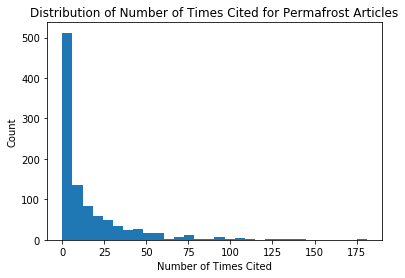

In [152]:
plt.hist(most_cited['is-referenced-by-count'], bins = 30) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Permafrost Articles') # set title
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

We can see that this histogram is very skewed, with the majority of articles being cited fewer than 50 times. We can adjust the bins in order to see a better distribution, by specifying the sizes of the bins.

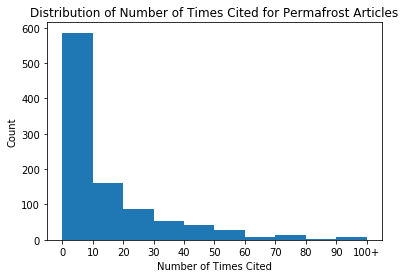

In [153]:
plt.hist(most_cited['is-referenced-by-count'], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]) # generate histogram

# labeling
plt.title('Distribution of Number of Times Cited for Permafrost Articles') # set title
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, '100+']) # set x axis tickmarks
plt.xlabel('Number of Times Cited') # set x label
plt.ylabel('Count'); # set y label

In the cells below, we've provided code to look at the number of times each article was cited for your `query_df`. In the following cell, try applying what you've just used to find the most cited article, the date it was published, and create a histogram showing the distribution for all articles.

In [ ]:
#your example
your_most_cited = query_df.sort_values('is-referenced-by-count', ascending=False)
your_most_cited = your_most_cited[['title', 'is-referenced-by-count', 'container-title', 'published-print', 'DOI']]
your_most_cited

In [ ]:
# fill in the ...

plt.hist(...['is-referenced-by-count'], bins = ...) # generate histogram

# labeling
plt.title('...') # set title
plt.xlabel('...') # set x label
plt.ylabel('...'); # set y label

# 3.2 Queries Over Time <a id = '3.2'></a>
For our final visualization, we will look at 2 queries over time. To expand our searches to 2 words, we will look at queries for permafrost melt and arctic methane, and look at the number of articles that were published by year. Since running queries takes a long time, and ideally we want to have more years to compare over time, we pre-ran the queries and saved the results into a csv which we'll load in the cell below.

The following 8 cells show the code we used to generate the csv files.

In [ ]:
cr_permafrost = cr.works(query="permafrost melt", cursor = "*", cursor_max = 5000, progress_bar = True)

In [ ]:
permafrost_items = [k['message']['items'] for k in cr_permafrost] # get items for all pages
permafrost_items = [item for sublist in permafrost_items for item in sublist] # restructure list

In [ ]:
permafrost_df = pd.DataFrame(permafrost_items)

In [ ]:
permafrost_df.to_csv('permafrost_melt_5000.csv')

In [ ]:
cr_arctic = cr.works(query="arctic methane", cursor = "*", cursor_max = 5000, progress_bar = True)

In [ ]:
arctic_items = [k['message']['items'] for k in cr_arctic] # get items for all pages
arctic_items = [item for sublist in arctic_items for item in sublist] # restructure list

In [ ]:
arctic_df = pd.DataFrame(arctic_items)

In [ ]:
arctic_df.to_csv('arctic_methane_5000.csv')

Below, we'll load in our query data and extract the year from the `created` column. Since we read in our data from a csv, our `created` column got converted to strings instead of dictionaries. We use the function `ast.literal_eval()` in order to convert the string back to a dictionary, and then access the year by indexing into `date-parts`.

In [ ]:
arctic_df = pd.read_csv('arctic_methane_5000.csv')
permafrost_df = pd.read_csv('permafrost_melt_5000.csv')

In [ ]:
arctic_years = [ast.literal_eval(k)['date-parts'][0][0] for k in arctic_df['created']] # extract year
permafrost_years = [ast.literal_eval(k)['date-parts'][0][0] for k in permafrost_df['created']] # extract year

In the cell below, we create a plot comparing the number of articles published for glacier melt and for permafrost melt per year. For `year_counts_glacier` and `year_counts_permafrost`, we use the python package `Counter` to return the counts of articles for each year. We sort by year so that our plot follows sequentially.

In [ ]:
year_counts_arctic = dict(sorted((Counter(arctic_years)).items())) # create dictionary of glacier year counts
year_counts_permafrost = dict(sorted((Counter(permafrost_years)).items())) # create dictionary of permafrost year counts
plt.plot(list(year_counts_arctic.keys()),list(year_counts_arctic.values()), label = 'arctic methane')
plt.plot(list(year_counts_permafrost.keys()),list(year_counts_permafrost.values()), label = 'permafrost melt')
#plt.xticks(np.arange(2002, 2019))
plt.title('Number of articles published by year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend();

Our search results show a spike in articles related to methane in the arctic in 2008 and 2011, and a later set of spikes for articles about permafrost melt between 2016-2019. We would have to dig in a bit more to understand the implications of these peaks, but they do give you a place to start when exploring trending topics.

If you are interested, you could repeat the process of getting queries and edit the above code to compare two search terms that you are interested about.

# Bibliography <a id = '4'></a>
- Paul Oldham - Adapted CrossRef R guide to Python. https://poldham.github.io/abs/crossref.html#introduction

---

Notebook originally developed by: Keilyn Yuzuki, Anjali Unnithan

This chapter originated as a Data Science Module: http://data.berkeley.edu/education/modules